#Overview

Name: Ishita Agrawal

Enrollment Number: 23411016

Branch and Batch: Civil (C3)

Goals: Perform EDA on the dataset containing median house price in a block (smallest census group in US) given other demographic and geographic information.

Dataset Used: California Census Data with Median Housing Price

#Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from google.colab import drive

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/housing.csv')

#Exploratory Data Analysis

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We have both numerical and categorical features

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We do not null values in the dataframe, hence we will not require imputation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

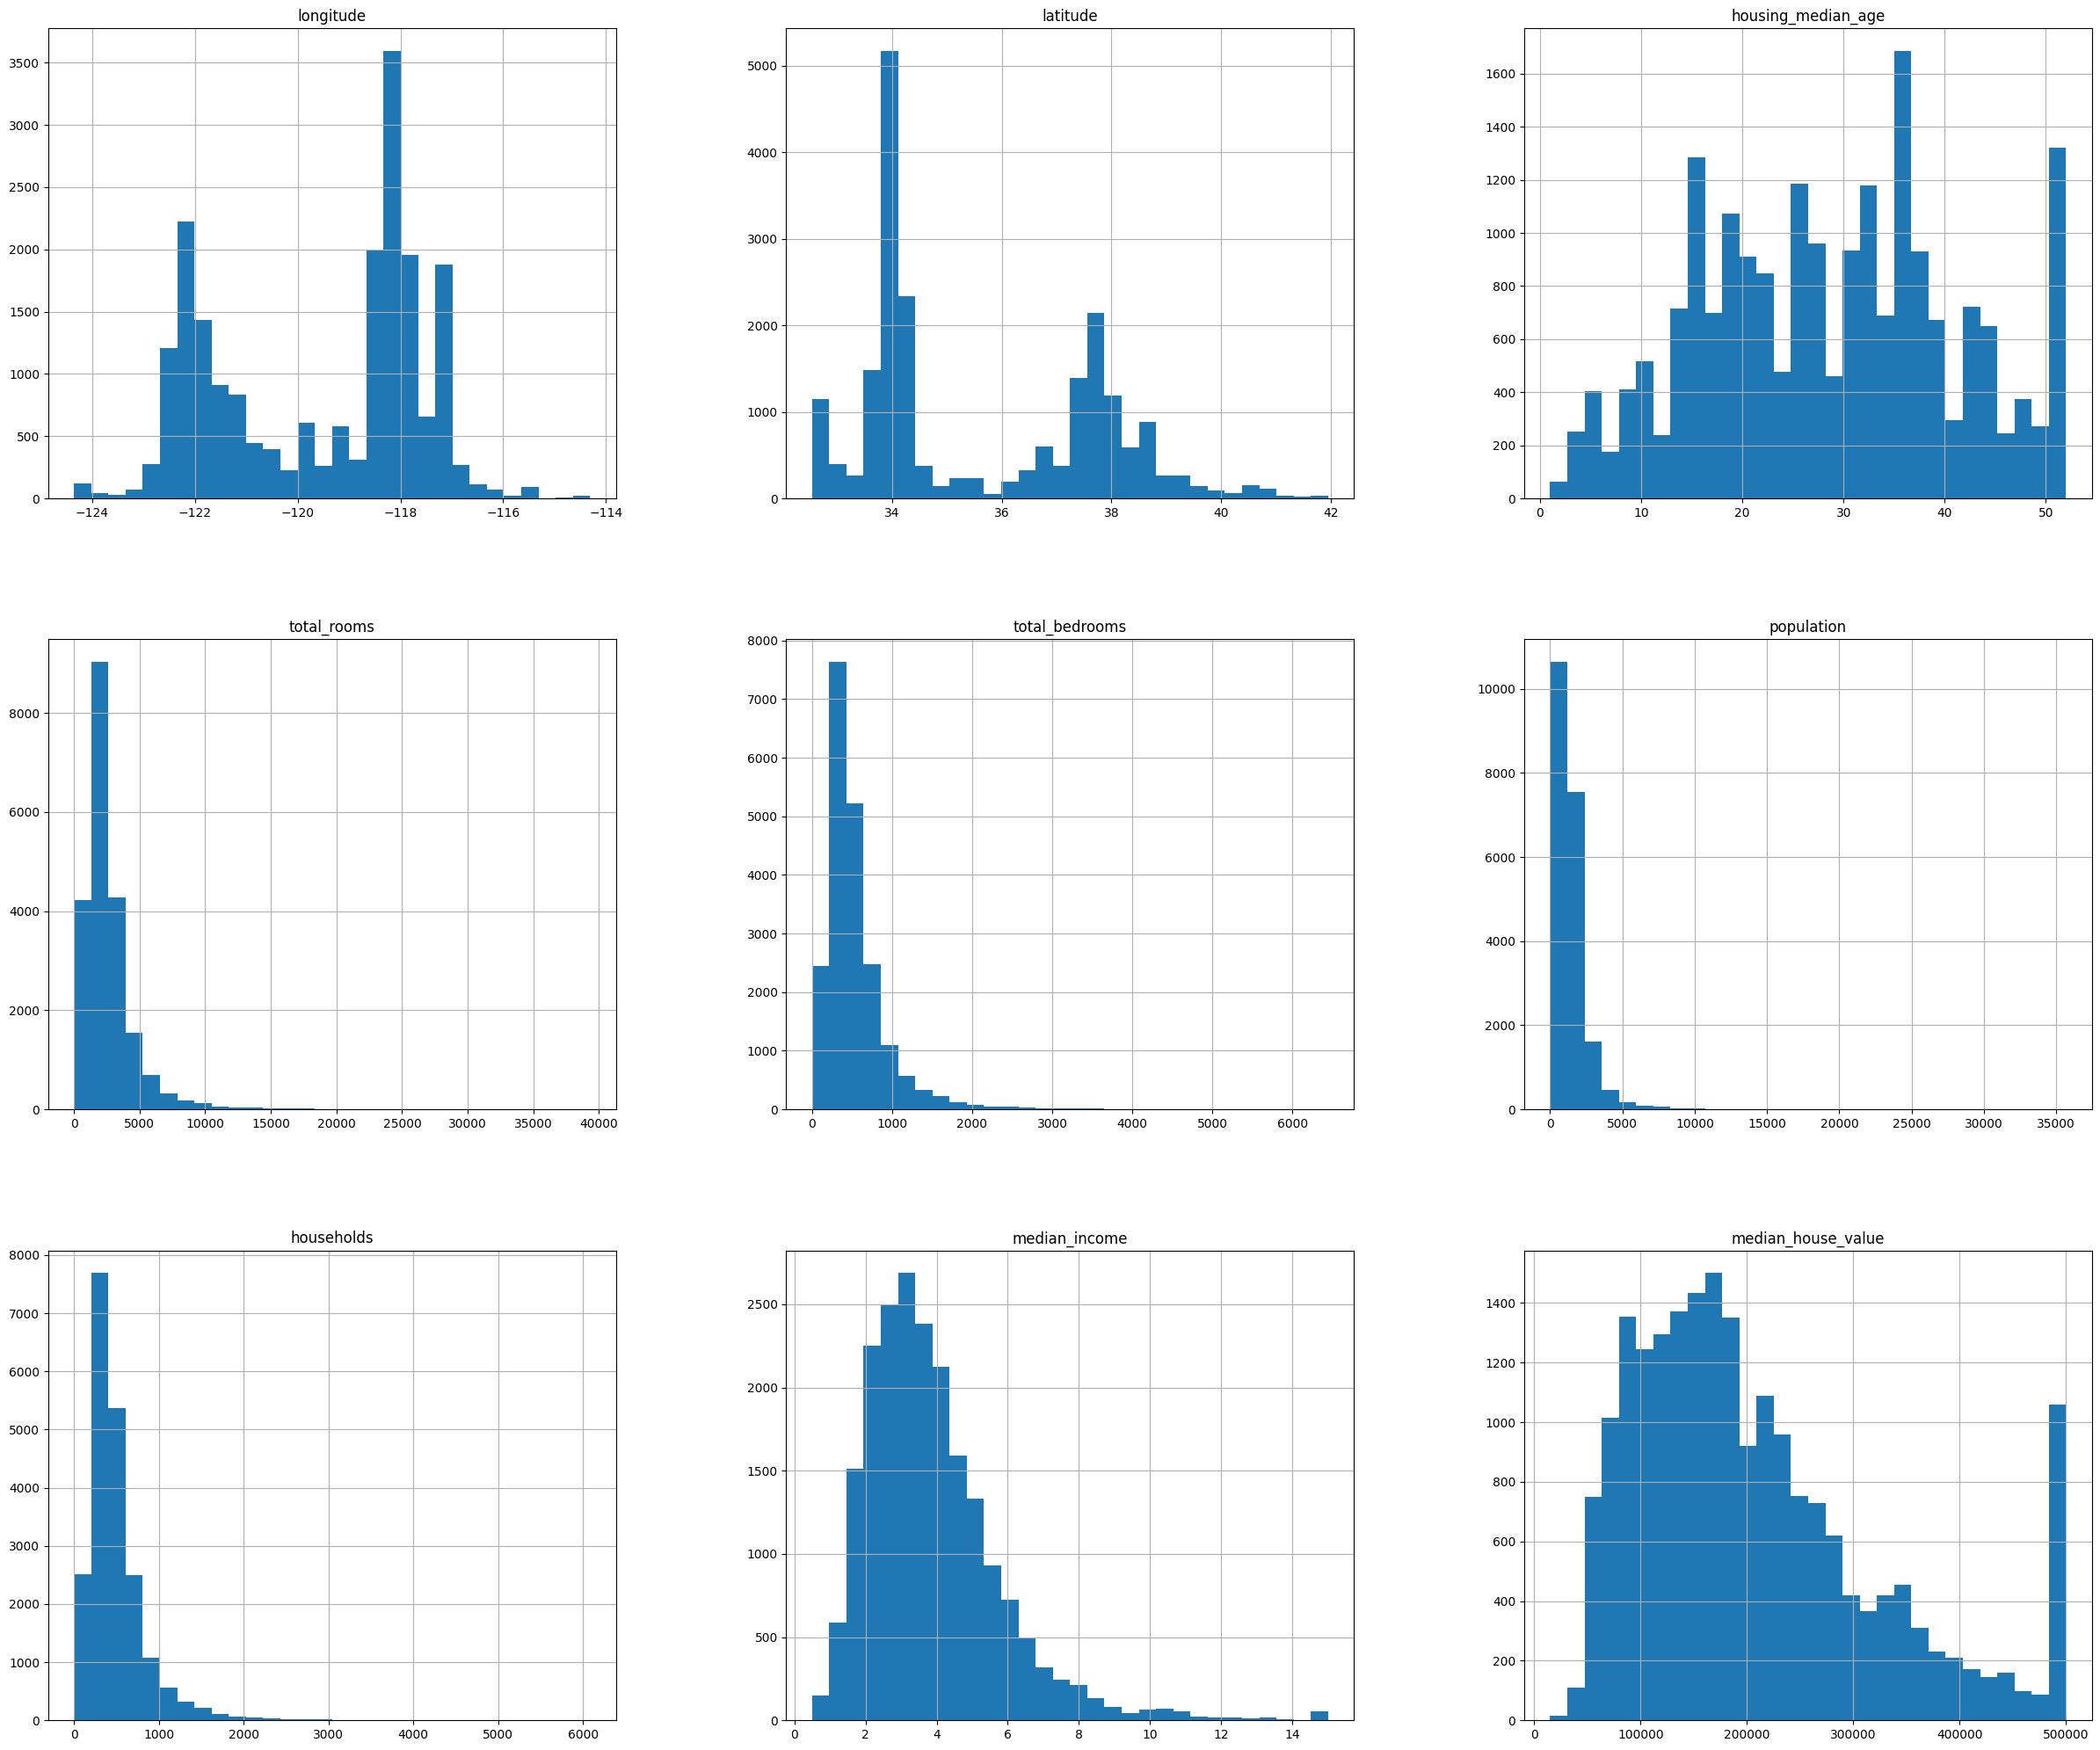

In [8]:
df.hist(bins=30,figsize=(30,25))

We can infer from the histograms that:

*   Median House Value is clipped at 500000, this may lead to poor predictions as the data is misrepresentative.
*   Median Income has some arbitrary scale factor.


array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

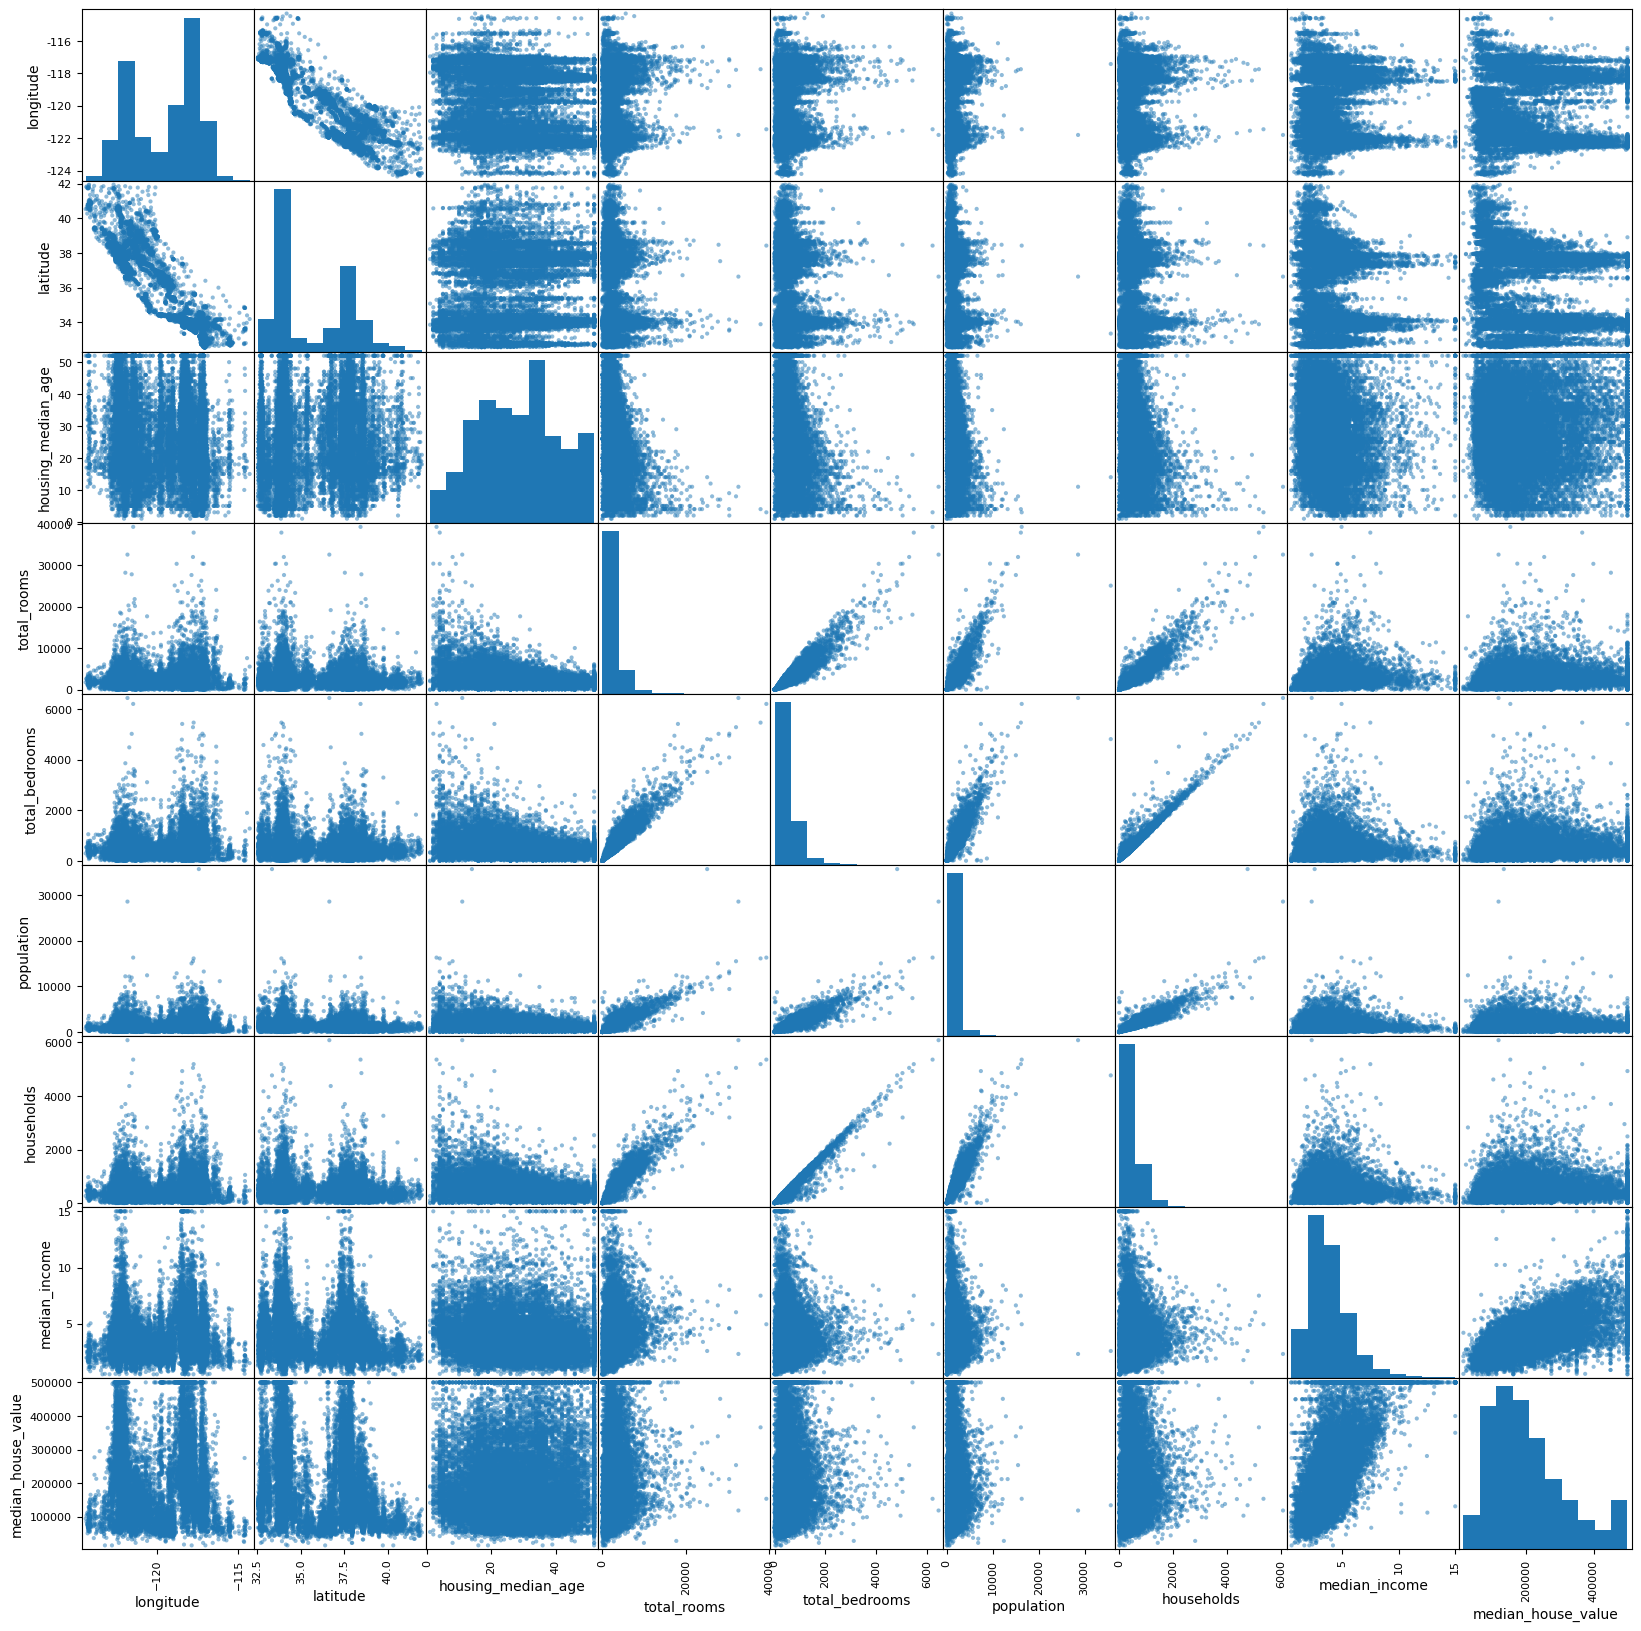

In [9]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

<Axes: xlabel='housing_median_age', ylabel='median_income'>

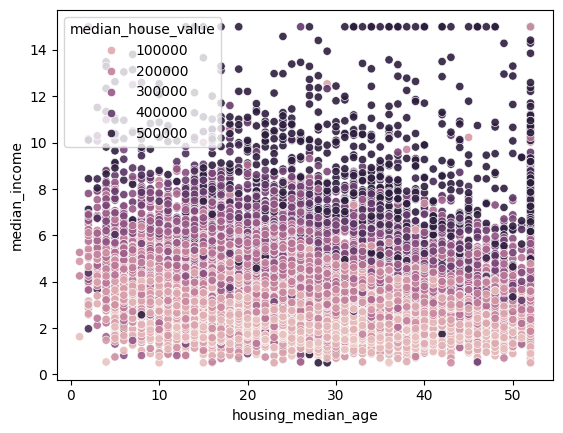

In [12]:
sns.scatterplot(x=df['housing_median_age'],y=df['median_income'],hue=df['median_house_value'],alpha=0.9)

We can see that the median house value has a positive relationship with the median income from the trend in the graph

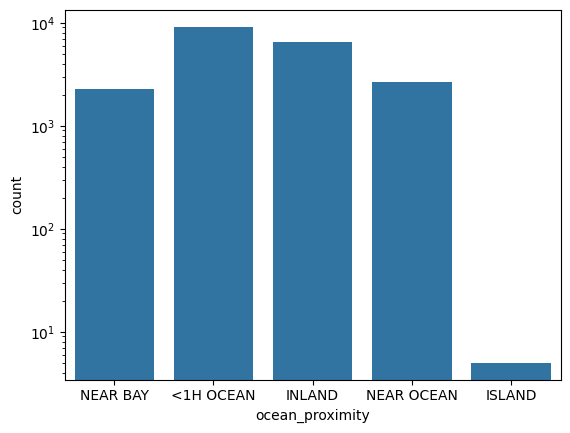

In [13]:
sns.countplot(x=df["ocean_proximity"])
plt.yscale('log')

We have exponentially lesser number of datapoints where ocean_proximity = 'ISLAND'

<Axes: xlabel='total_bedrooms', ylabel='population'>

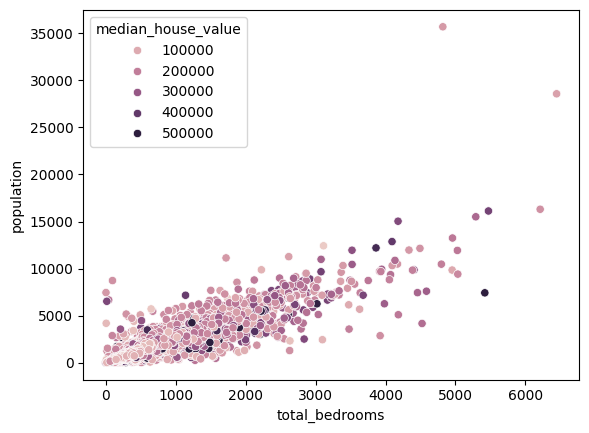

In [15]:
sns.scatterplot(x=df['total_bedrooms'],y=df['population'],hue=df['median_house_value'])

Total bedrooms and population have a strong positive correlation.

Text(0.5, 1.0, 'Correlation Matrix')

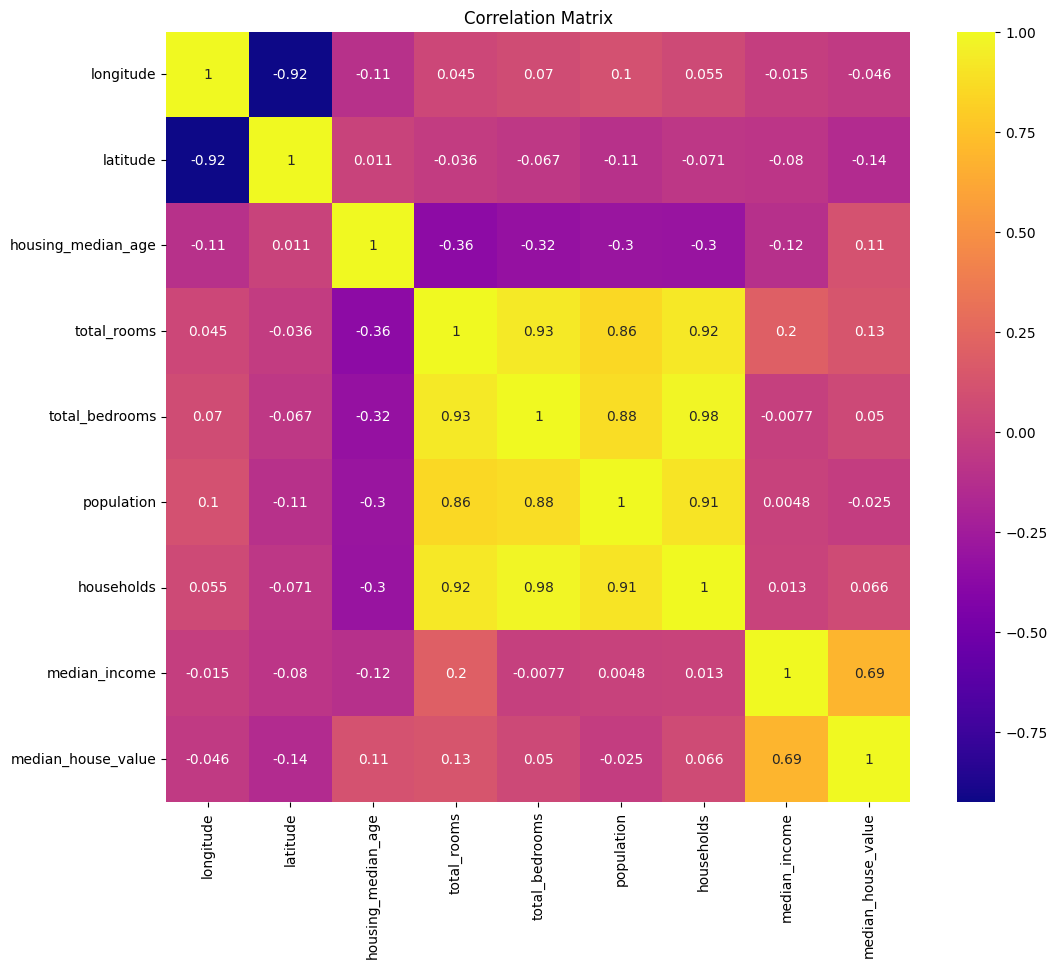

In [17]:
f, ax = plt.subplots(figsize=(12, 10))
df = df.drop(columns=('ocean_proximity'))
sns.heatmap(df.corr(), annot=True,cmap='plasma')
plt.title("Correlation Matrix")

High correlation pairs:

*   Median House value & median_income
*   Latitude & Longitude(No significance, sheerly due to geographic location of areas)
*   Total rooms & Households
*   Total bedrooms & Households

*   Population & Total rooms
*   Population & Total bedrooms

Text(0.5, 1.0, 'Geographic plot representing house value trends')

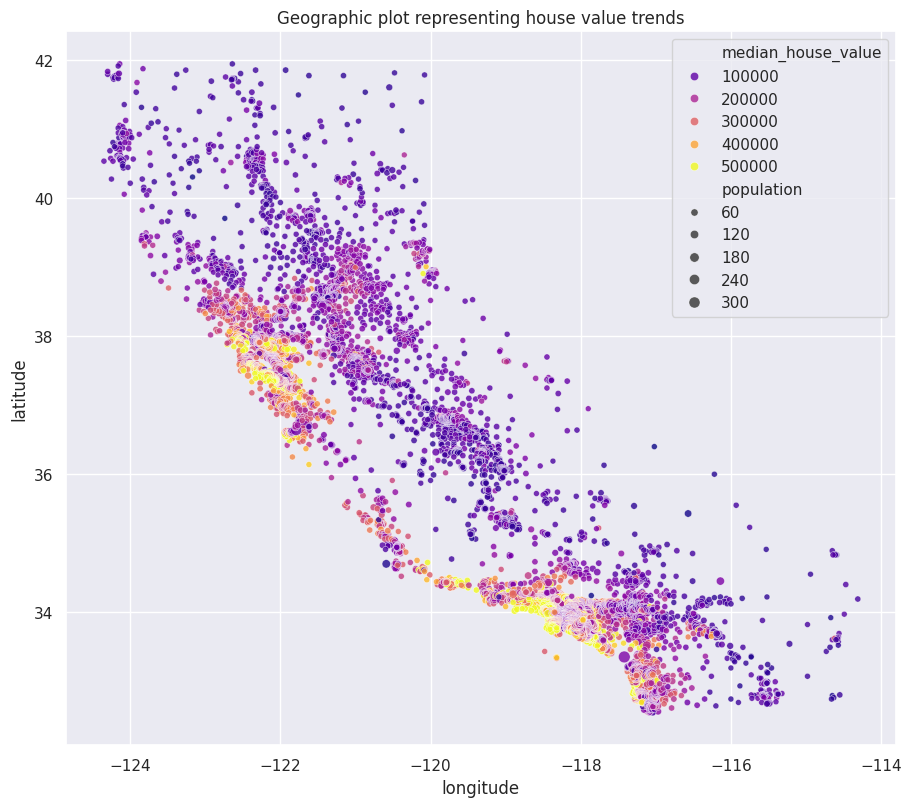

In [18]:
sns.set(rc={'figure.figsize':(10.7,9.27)})
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['median_house_value'],size=df['population']/100,alpha=0.8,palette='plasma')
plt.title('Geographic plot representing house value trends')

This plot shows that houses near the coast are generally more expensive